In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import pytorch_tabnet
import pickle
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.augmentations import ClassificationSMOTE

from sklearn.preprocessing import LabelEncoder

from Utility import *

from matplotlib import pyplot as plt

### Define optimizers

In [2]:
sgd = torch.optim.SGD
adam = torch.optim.Adam

# SGD

In [3]:
sgd_df = pd.DataFrame(columns=['n', 'p', 'd', 'rel_imp', 'irrel_imp', 'rand_imp', 'train_auc', 'valid_auc', 'test_auc', 'fn_rel', 'fp_irrel', 'fp_rand'])

### SGD; N = 50, p = 6, d = 4

In [4]:
data, info = get_files(50, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = sgd)
clf_sgd_50_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.13907 | train_auc: 0.49689 | valid_auc: 0.77778 |  0:00:00s
epoch 1  | loss: 1.6463  | train_auc: 0.50621 | valid_auc: 0.55556 |  0:00:00s
epoch 2  | loss: 1.47087 | train_auc: 0.51553 | valid_auc: 0.55556 |  0:00:00s
epoch 3  | loss: 1.72982 | train_auc: 0.54037 | valid_auc: 0.55556 |  0:00:00s
epoch 4  | loss: 1.75162 | train_auc: 0.57143 | valid_auc: 0.55556 |  0:00:01s
epoch 5  | loss: 1.53611 | train_auc: 0.57143 | valid_auc: 0.55556 |  0:00:01s
epoch 6  | loss: 1.58969 | train_auc: 0.60559 | valid_auc: 0.55556 |  0:00:01s
epoch 7  | loss: 1.23461 | train_auc: 0.6118  | valid_auc: 0.55556 |  0:00:01s
epoch 8  | loss: 1.16877 | train_auc: 0.60248 | valid_auc: 0.44444 |  0:00:01s
epoch 9  | loss: 1.74158 | train_auc: 0.60248 | valid_auc: 0.44444 |  0:00:01s
epoch 10 | loss: 1.23919 | train_auc: 0.57764 | valid_auc: 0.44444 |  0:00:01s
epoch 11 | loss: 1.50132 | train_auc: 0.58696 | valid_auc: 0.44444 |  0:00:02s
epoch 12 | loss: 1.64356 | train_auc: 0.57143 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.14257212874118458
Average irrelevant feature importance: 0.10640576060009484
Average random feature importance: 0.09890961517933658
Train AUC score: 0.8695652173913043
Validation AUC score: 1.0
Test AUC score: 0.4166666666666667
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 0.3333333333333333
False positive rate for random features: 0.25


C:\Users\hberg\AppData\Local\Temp\ipykernel_26896\1053820611.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)


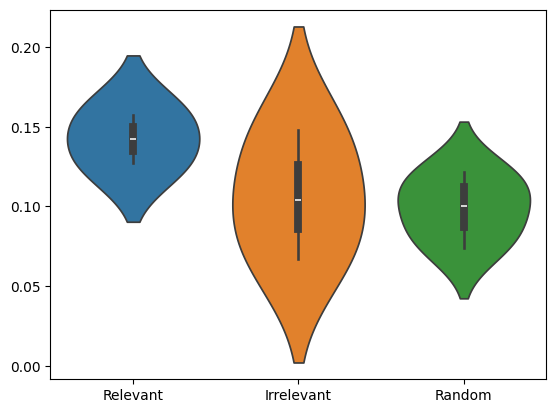

In [5]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_50_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_50_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_50_6_4.png"))
new_row = {'n': 50, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 50, p = 60, d = 40

In [6]:
data, info = get_files(50, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = sgd)
clf_sgd_50_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.99411 | train_auc: 0.46491 | valid_auc: 0.75    |  0:00:00s
epoch 1  | loss: 0.7465  | train_auc: 0.53801 | valid_auc: 0.66667 |  0:00:00s
epoch 2  | loss: 1.02534 | train_auc: 0.55556 | valid_auc: 0.66667 |  0:00:00s
epoch 3  | loss: 1.22301 | train_auc: 0.5117  | valid_auc: 0.66667 |  0:00:00s
epoch 4  | loss: 0.74478 | train_auc: 0.50585 | valid_auc: 0.66667 |  0:00:01s
epoch 5  | loss: 0.70471 | train_auc: 0.50292 | valid_auc: 0.83333 |  0:00:01s
epoch 6  | loss: 0.77979 | train_auc: 0.50585 | valid_auc: 0.83333 |  0:00:01s
epoch 7  | loss: 1.14174 | train_auc: 0.49123 | valid_auc: 0.66667 |  0:00:01s
epoch 8  | loss: 0.83708 | train_auc: 0.5     | valid_auc: 0.75    |  0:00:02s
epoch 9  | loss: 0.71248 | train_auc: 0.54678 | valid_auc: 0.75    |  0:00:02s
epoch 10 | loss: 0.77066 | train_auc: 0.54094 | valid_auc: 0.75    |  0:00:02s
epoch 11 | loss: 0.92856 | train_auc: 0.54678 | valid_auc: 0.83333 |  0:00:02s
epoch 12 | loss: 1.02758 | train_auc: 0.55263 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.011169759615995572
Average irrelevant feature importance: 0.010225031964659265
Average random feature importance: 0.00937485945260921
Train AUC score: 0.7105263157894737
Validation AUC score: 1.0
Test AUC score: 0.0
False negative rate for relevant features: 0.391304347826087
False positive rate for irrelevant features: 0.4722222222222222
False positive rate for random features: 0.475


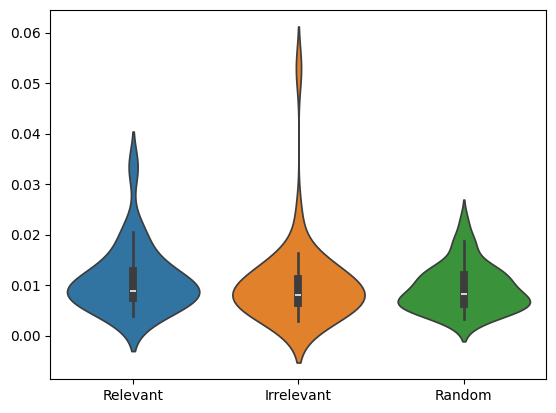

In [7]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_50_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_50_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_50_60_40.png"))
new_row = {'n': 50, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 50, p = 600, d = 400

In [8]:
data, info = get_files(50, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = sgd)
clf_sgd_50_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.96177 | train_auc: 0.45238 | valid_auc: 0.75    |  0:00:00s
epoch 1  | loss: 0.58523 | train_auc: 0.36607 | valid_auc: 1.0     |  0:00:01s
epoch 2  | loss: 0.93489 | train_auc: 0.41964 | valid_auc: 1.0     |  0:00:02s
epoch 3  | loss: 0.88746 | train_auc: 0.33631 | valid_auc: 1.0     |  0:00:03s
epoch 4  | loss: 1.02802 | train_auc: 0.30357 | valid_auc: 1.0     |  0:00:04s
epoch 5  | loss: 1.00659 | train_auc: 0.34226 | valid_auc: 0.91667 |  0:00:05s
epoch 6  | loss: 0.80084 | train_auc: 0.34226 | valid_auc: 0.75    |  0:00:06s
epoch 7  | loss: 0.87001 | train_auc: 0.40179 | valid_auc: 0.66667 |  0:00:07s
epoch 8  | loss: 0.80797 | train_auc: 0.40179 | valid_auc: 0.66667 |  0:00:08s
epoch 9  | loss: 0.9357  | train_auc: 0.42262 | valid_auc: 0.58333 |  0:00:09s
epoch 10 | loss: 1.02106 | train_auc: 0.42262 | valid_auc: 0.5     |  0:00:10s
epoch 11 | loss: 1.00606 | train_auc: 0.47321 | valid_auc: 0.58333 |  0:00:11s
epoch 12 | loss: 0.9727  | train_auc: 0.4881  | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.0005220524575961368
Average irrelevant feature importance: 0.0008941707017869564
Average random feature importance: 0.0011981911984931147
Train AUC score: 0.36607142857142855
Validation AUC score: 1.0
Test AUC score: 0.75
False negative rate for relevant features: 0.6
False positive rate for irrelevant features: 0.5116279069767442
False positive rate for random features: 0.4925


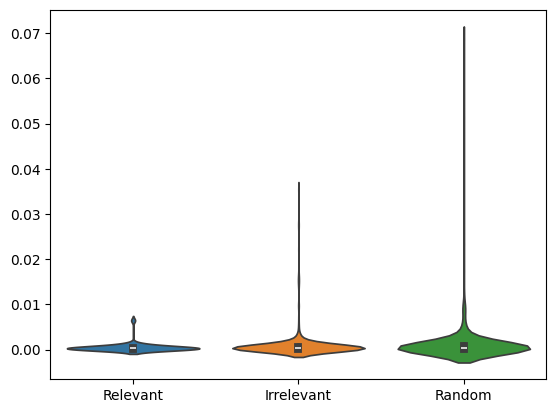

In [9]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_50_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_50_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_50_600_400.png"))
new_row = {'n': 50, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 500, p = 6, d = 4

In [10]:
data, info = get_files(500, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = sgd)
clf_sgd_500_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.93818 | train_auc: 0.47623 | valid_auc: 0.43013 |  0:00:01s
epoch 1  | loss: 0.96968 | train_auc: 0.49651 | valid_auc: 0.40472 |  0:00:02s
epoch 2  | loss: 0.87123 | train_auc: 0.50815 | valid_auc: 0.44102 |  0:00:03s
epoch 3  | loss: 0.82556 | train_auc: 0.53884 | valid_auc: 0.48094 |  0:00:04s
epoch 4  | loss: 0.77567 | train_auc: 0.57897 | valid_auc: 0.45191 |  0:00:05s
epoch 5  | loss: 0.77101 | train_auc: 0.57972 | valid_auc: 0.45009 |  0:00:07s
epoch 6  | loss: 0.69109 | train_auc: 0.60534 | valid_auc: 0.46461 |  0:00:08s
epoch 7  | loss: 0.69726 | train_auc: 0.60672 | valid_auc: 0.47913 |  0:00:09s
epoch 8  | loss: 0.69715 | train_auc: 0.62989 | valid_auc: 0.51906 |  0:00:10s
epoch 9  | loss: 0.62336 | train_auc: 0.64047 | valid_auc: 0.56624 |  0:00:11s
epoch 10 | loss: 0.62235 | train_auc: 0.67242 | valid_auc: 0.54809 |  0:00:12s
epoch 11 | loss: 0.58043 | train_auc: 0.72001 | valid_auc: 0.6225  |  0:00:13s
epoch 12 | loss: 0.5917  | train_auc: 0.74755 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.16697425615742914
Average irrelevant feature importance: 0.179926256756581
Average random feature importance: 0.034806179503637666
Train AUC score: 0.9967734109655507
Validation AUC score: 1.0
Test AUC score: 0.9649122807017544
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 0.5
False positive rate for random features: 0.0


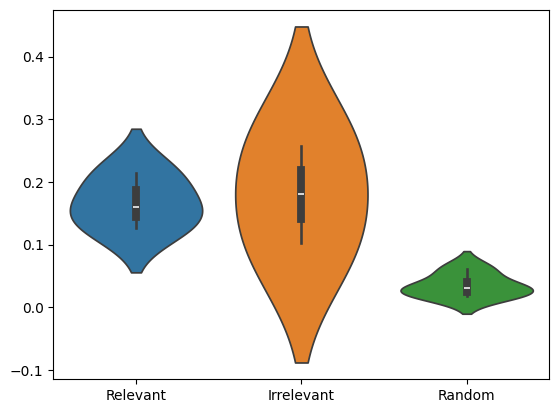

In [11]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_500_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_500_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_500_6_4.png"))
new_row = {'n': 500, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 500, p = 60, d = 40

In [12]:
data, info = get_files(500, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = sgd)
clf_sgd_500_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.96494 | train_auc: 0.45777 | valid_auc: 0.54102 |  0:00:01s
epoch 1  | loss: 0.94415 | train_auc: 0.48414 | valid_auc: 0.49219 |  0:00:02s
epoch 2  | loss: 0.85558 | train_auc: 0.47158 | valid_auc: 0.50781 |  0:00:03s
epoch 3  | loss: 0.83811 | train_auc: 0.51077 | valid_auc: 0.54883 |  0:00:05s
epoch 4  | loss: 0.87473 | train_auc: 0.50714 | valid_auc: 0.54102 |  0:00:06s
epoch 5  | loss: 0.93701 | train_auc: 0.52936 | valid_auc: 0.49219 |  0:00:07s
epoch 6  | loss: 0.84365 | train_auc: 0.55063 | valid_auc: 0.58594 |  0:00:08s
epoch 7  | loss: 0.86338 | train_auc: 0.53973 | valid_auc: 0.54688 |  0:00:10s
epoch 8  | loss: 0.86694 | train_auc: 0.52156 | valid_auc: 0.5625  |  0:00:11s
epoch 9  | loss: 0.84422 | train_auc: 0.53703 | valid_auc: 0.53711 |  0:00:12s
epoch 10 | loss: 0.85464 | train_auc: 0.53396 | valid_auc: 0.61133 |  0:00:13s
epoch 11 | loss: 0.83944 | train_auc: 0.5228  | valid_auc: 0.48633 |  0:00:15s
epoch 12 | loss: 0.79277 | train_auc: 0.52757 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.012535896187503181
Average irrelevant feature importance: 0.01033651943004937
Average random feature importance: 0.008763914299822963
Train AUC score: 0.7233047954199274
Validation AUC score: 0.75
Test AUC score: 0.6467236467236467
False negative rate for relevant features: 0.4444444444444444
False positive rate for irrelevant features: 0.43902439024390244
False positive rate for random features: 0.525


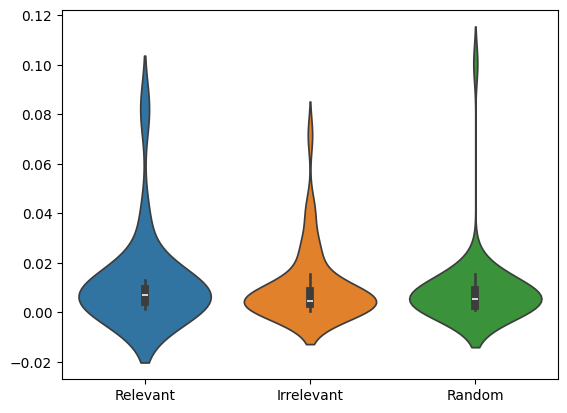

In [13]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_500_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_500_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_500_60_40.png"))
new_row = {'n': 500, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 500, p = 600, d = 400

In [14]:
data, info = get_files(500, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = sgd)
clf_sgd_500_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.3749  | train_auc: 0.40524 | valid_auc: 0.46196 |  0:00:02s
epoch 1  | loss: 1.35063 | train_auc: 0.41484 | valid_auc: 0.52174 |  0:00:05s
epoch 2  | loss: 1.39709 | train_auc: 0.44142 | valid_auc: 0.42754 |  0:00:08s
epoch 3  | loss: 1.22723 | train_auc: 0.41357 | valid_auc: 0.44565 |  0:00:10s
epoch 4  | loss: 1.24383 | train_auc: 0.41732 | valid_auc: 0.44203 |  0:00:13s
epoch 5  | loss: 1.26368 | train_auc: 0.44242 | valid_auc: 0.45109 |  0:00:15s
epoch 6  | loss: 1.36362 | train_auc: 0.48253 | valid_auc: 0.51268 |  0:00:18s
epoch 7  | loss: 1.37317 | train_auc: 0.47849 | valid_auc: 0.49638 |  0:00:20s
epoch 8  | loss: 1.25776 | train_auc: 0.48083 | valid_auc: 0.56884 |  0:00:23s
epoch 9  | loss: 1.32759 | train_auc: 0.47549 | valid_auc: 0.47826 |  0:00:25s
epoch 10 | loss: 1.17195 | train_auc: 0.48408 | valid_auc: 0.5     |  0:00:28s
epoch 11 | loss: 1.23562 | train_auc: 0.48405 | valid_auc: 0.48007 |  0:00:30s
epoch 12 | loss: 1.23706 | train_auc: 0.45662 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.001063451424817738
Average irrelevant feature importance: 0.0011358793940305938
Average random feature importance: 0.0008165843899733033
Train AUC score: 0.6557851652191274
Validation AUC score: 0.8423913043478262
Test AUC score: 0.6103703703703703
False negative rate for relevant features: 0.4948453608247423
False positive rate for irrelevant features: 0.5039840637450199
False positive rate for random features: 0.4925


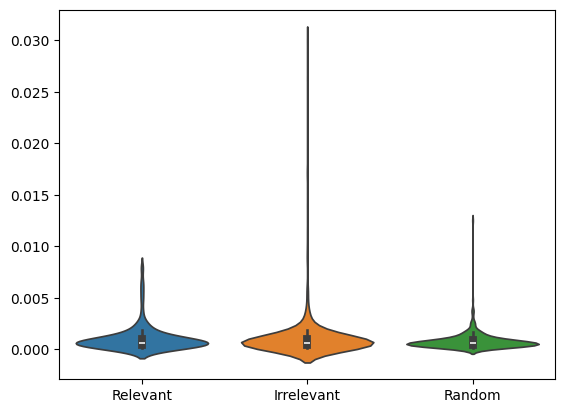

In [15]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_500_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_500_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)
plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_500_600_400.png"))
new_row = {'n': 500, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 5000, p = 6, d = 4

In [16]:
data, info = get_files(5000, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = sgd)
clf_sgd_5000_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.67574 | train_auc: 0.81341 | valid_auc: 0.81279 |  0:00:11s
epoch 1  | loss: 0.56728 | train_auc: 0.84325 | valid_auc: 0.83507 |  0:00:21s
epoch 2  | loss: 0.54501 | train_auc: 0.87325 | valid_auc: 0.87321 |  0:00:31s
epoch 3  | loss: 0.50249 | train_auc: 0.8835  | valid_auc: 0.88965 |  0:00:41s
epoch 4  | loss: 0.51388 | train_auc: 0.89253 | valid_auc: 0.90508 |  0:00:50s
epoch 5  | loss: 0.4956  | train_auc: 0.89617 | valid_auc: 0.90756 |  0:01:00s
epoch 6  | loss: 0.48335 | train_auc: 0.89563 | valid_auc: 0.91187 |  0:01:11s
epoch 7  | loss: 0.48924 | train_auc: 0.896   | valid_auc: 0.9142  |  0:01:21s
epoch 8  | loss: 0.48734 | train_auc: 0.90009 | valid_auc: 0.91716 |  0:01:31s
epoch 9  | loss: 0.4608  | train_auc: 0.90071 | valid_auc: 0.91428 |  0:01:42s
epoch 10 | loss: 0.46771 | train_auc: 0.902   | valid_auc: 0.91417 |  0:01:52s
epoch 11 | loss: 0.45008 | train_auc: 0.90307 | valid_auc: 0.91453 |  0:02:01s
epoch 12 | loss: 0.47778 | train_auc: 0.90741 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.13898829296447096
Average irrelevant feature importance: 0.3577346038946556
Average random feature importance: 0.02157805606186516
Train AUC score: 0.9074086722789014
Validation AUC score: 0.9212765013093459
Test AUC score: 0.9208398737488819
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 1.0
False positive rate for random features: 0.0


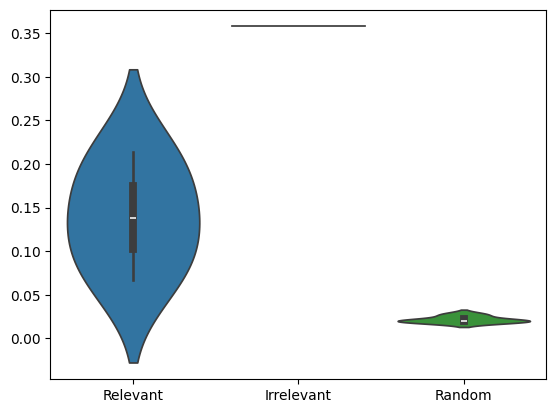

In [17]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_5000_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_5000_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_5000_6_4.png"))
new_row = {'n': 5000, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 5000, p = 60, d = 40

In [18]:
data, info = get_files(5000, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = sgd)
clf_sgd_5000_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.82273 | train_auc: 0.56143 | valid_auc: 0.54483 |  0:00:11s
epoch 1  | loss: 0.77622 | train_auc: 0.59721 | valid_auc: 0.61678 |  0:00:22s
epoch 2  | loss: 0.71571 | train_auc: 0.62539 | valid_auc: 0.66662 |  0:00:34s
epoch 3  | loss: 0.6837  | train_auc: 0.68059 | valid_auc: 0.67499 |  0:00:45s
epoch 4  | loss: 0.66288 | train_auc: 0.71456 | valid_auc: 0.71648 |  0:00:57s
epoch 5  | loss: 0.64406 | train_auc: 0.73016 | valid_auc: 0.73458 |  0:01:08s
epoch 6  | loss: 0.6317  | train_auc: 0.78045 | valid_auc: 0.80976 |  0:01:20s
epoch 7  | loss: 0.60545 | train_auc: 0.79957 | valid_auc: 0.80462 |  0:01:31s
epoch 8  | loss: 0.59072 | train_auc: 0.81055 | valid_auc: 0.81247 |  0:01:43s
epoch 9  | loss: 0.56445 | train_auc: 0.82427 | valid_auc: 0.80257 |  0:01:54s
epoch 10 | loss: 0.54968 | train_auc: 0.85397 | valid_auc: 0.82433 |  0:02:05s
epoch 11 | loss: 0.54499 | train_auc: 0.85487 | valid_auc: 0.83944 |  0:02:17s
epoch 12 | loss: 0.54523 | train_auc: 0.86988 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.004211392525047311
Average irrelevant feature importance: 0.019658497797366486
Average random feature importance: 0.000251669698772211
Train AUC score: 0.997417560490371
Validation AUC score: 0.9973948975925261
Test AUC score: 0.9978512396694215
False negative rate for relevant features: 0.6363636363636364
False positive rate for irrelevant features: 0.6041666666666666
False positive rate for random features: 0.4


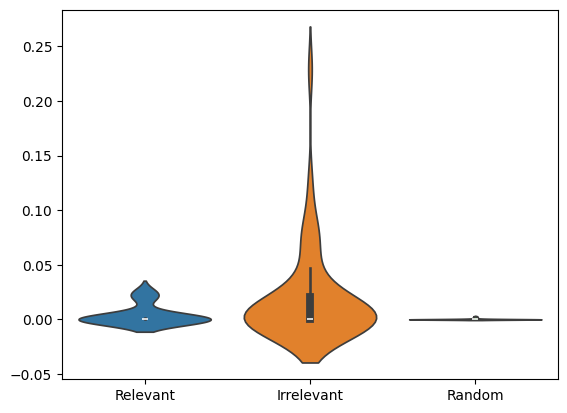

In [19]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_5000_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_5000_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_5000_60_40.png"))
new_row = {'n': 5000, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 5000, p = 600, d = 400

In [20]:
data, info = get_files(5000, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = sgd)
clf_sgd_5000_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.91815 | train_auc: 0.45201 | valid_auc: 0.42724 |  0:00:21s
epoch 1  | loss: 0.88459 | train_auc: 0.45012 | valid_auc: 0.43194 |  0:00:43s
epoch 2  | loss: 0.86539 | train_auc: 0.46279 | valid_auc: 0.46151 |  0:01:06s
epoch 3  | loss: 0.83191 | train_auc: 0.47291 | valid_auc: 0.47448 |  0:01:28s
epoch 4  | loss: 0.85446 | train_auc: 0.48207 | valid_auc: 0.48398 |  0:01:50s
epoch 5  | loss: 0.83724 | train_auc: 0.48547 | valid_auc: 0.4719  |  0:02:12s
epoch 6  | loss: 0.82115 | train_auc: 0.4813  | valid_auc: 0.45952 |  0:02:34s
epoch 7  | loss: 0.80812 | train_auc: 0.48298 | valid_auc: 0.48283 |  0:02:56s
epoch 8  | loss: 0.80435 | train_auc: 0.47751 | valid_auc: 0.50269 |  0:03:18s
epoch 9  | loss: 0.79923 | train_auc: 0.49301 | valid_auc: 0.46424 |  0:03:40s
epoch 10 | loss: 0.7957  | train_auc: 0.47517 | valid_auc: 0.51168 |  0:04:02s
epoch 11 | loss: 0.76021 | train_auc: 0.49211 | valid_auc: 0.49916 |  0:04:24s
epoch 12 | loss: 0.77131 | train_auc: 0.49567 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 9.299675553226546e-05
Average irrelevant feature importance: 0.003282357473386404
Average random feature importance: 0.0002876528919852427
Train AUC score: 0.9918471866636042
Validation AUC score: 0.9135956108657834
Test AUC score: 0.9418367346938775
False negative rate for relevant features: 0.5221238938053098
False positive rate for irrelevant features: 0.5269230769230769
False positive rate for random features: 0.5


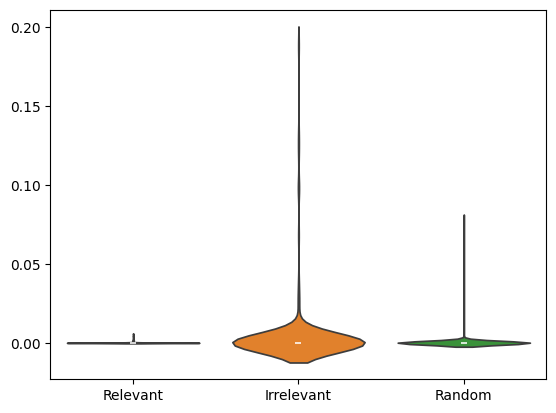

In [21]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_5000_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_5000_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_5000_600_400.png"))
new_row = {'n': 5000, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

In [22]:
sgd_df.to_csv(os.path.join("Results/SGD", "sgd_data.csv"), index=False)

# Adam

In [23]:
adam_df = pd.DataFrame(columns=['n', 'p', 'd', 'rel_imp', 'irrel_imp', 'rand_imp', 'train_auc', 'valid_auc', 'test_auc', 'fn_rel', 'fp_irrel', 'fp_rand'])

### Adam; N = 50, p = 6, d = 4

In [24]:
data, info = get_files(50, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = adam)
clf_adam_50_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.02071 | train_auc: 0.65641 | valid_auc: 0.5     |  0:00:00s
epoch 1  | loss: 0.84293 | train_auc: 0.45641 | valid_auc: 0.5     |  0:00:00s
epoch 2  | loss: 0.79935 | train_auc: 0.55385 | valid_auc: 0.5     |  0:00:00s
epoch 3  | loss: 0.64231 | train_auc: 0.72821 | valid_auc: 0.75    |  0:00:00s
epoch 4  | loss: 0.66889 | train_auc: 0.61795 | valid_auc: 0.5     |  0:00:00s
epoch 5  | loss: 0.68759 | train_auc: 0.61026 | valid_auc: 0.5     |  0:00:01s
epoch 6  | loss: 0.65541 | train_auc: 0.55128 | valid_auc: 0.0     |  0:00:01s
epoch 7  | loss: 0.7445  | train_auc: 0.62821 | valid_auc: 0.5     |  0:00:01s
epoch 8  | loss: 0.68605 | train_auc: 0.67436 | valid_auc: 0.5     |  0:00:01s
epoch 9  | loss: 0.69557 | train_auc: 0.60513 | valid_auc: 0.5     |  0:00:01s
epoch 10 | loss: 0.68197 | train_auc: 0.71538 | valid_auc: 0.75    |  0:00:01s
epoch 11 | loss: 0.66858 | train_auc: 0.72051 | valid_auc: 0.5     |  0:00:01s
epoch 12 | loss: 0.71195 | train_auc: 0.6359  | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.14364942984507148
Average irrelevant feature importance: 0.17331970099294544
Average random feature importance: 0.04818550933275519
Train AUC score: 0.7102564102564103
Validation AUC score: 1.0
Test AUC score: 0.0
False negative rate for relevant features: 0.5
False positive rate for irrelevant features: 1.0
False positive rate for random features: 0.0


C:\Users\hberg\AppData\Local\Temp\ipykernel_26896\2164218204.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)


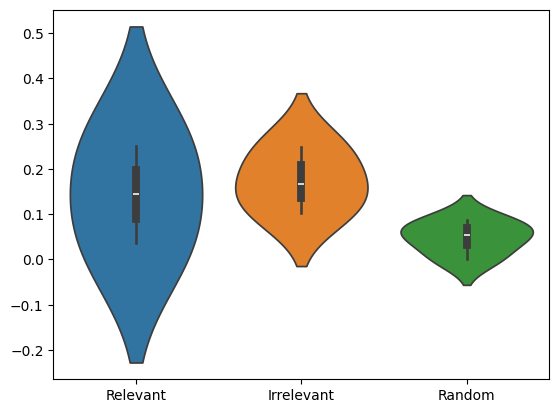

In [25]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_50_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_50_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_50_6_4.png"))
new_row = {'n': 50, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 50, p = 60, d = 40

In [26]:
data, info = get_files(50, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = adam)
clf_adam_50_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.93941 | train_auc: 0.4798  | valid_auc: 0.2     |  0:00:00s
epoch 1  | loss: 0.91119 | train_auc: 0.66919 | valid_auc: 0.4     |  0:00:00s
epoch 2  | loss: 0.82809 | train_auc: 0.67172 | valid_auc: 0.0     |  0:00:00s
epoch 3  | loss: 0.67714 | train_auc: 0.56566 | valid_auc: 0.0     |  0:00:00s
epoch 4  | loss: 0.73027 | train_auc: 0.45202 | valid_auc: 0.0     |  0:00:01s
epoch 5  | loss: 0.72703 | train_auc: 0.45455 | valid_auc: 0.8     |  0:00:01s
epoch 6  | loss: 0.68606 | train_auc: 0.5303  | valid_auc: 0.2     |  0:00:01s
epoch 7  | loss: 0.72894 | train_auc: 0.60354 | valid_auc: 0.4     |  0:00:01s
epoch 8  | loss: 0.75915 | train_auc: 0.61364 | valid_auc: 0.2     |  0:00:02s
epoch 9  | loss: 0.67842 | train_auc: 0.63636 | valid_auc: 0.4     |  0:00:02s
epoch 10 | loss: 0.69585 | train_auc: 0.67172 | valid_auc: 0.0     |  0:00:02s
epoch 11 | loss: 0.6693  | train_auc: 0.56818 | valid_auc: 0.4     |  0:00:02s
epoch 12 | loss: 0.74282 | train_auc: 0.47222 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.004123256926503849
Average irrelevant feature importance: 0.016367300163550882
Average random feature importance: 0.007898557120064494
Train AUC score: 0.6641414141414141
Validation AUC score: 1.0
Test AUC score: 0.0
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 0.4166666666666667
False positive rate for random features: 0.35


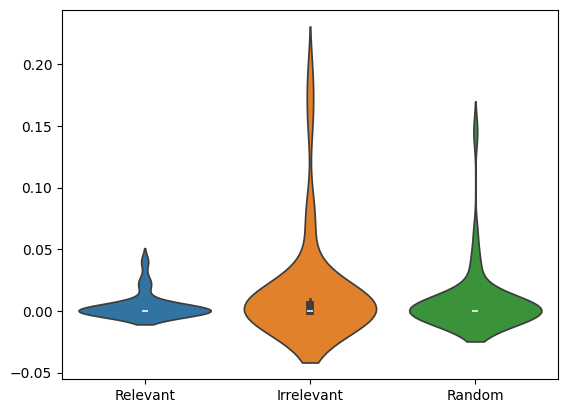

In [27]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_50_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_50_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_50_60_40.png"))
new_row = {'n': 50, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 50, p = 600, d = 400

In [28]:
data, info = get_files(50, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = adam)
clf_adam_50_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.88278 | train_auc: 0.41667 | valid_auc: 0.75    |  0:00:00s
epoch 1  | loss: 1.17181 | train_auc: 0.72222 | valid_auc: 0.0     |  0:00:01s
epoch 2  | loss: 0.74905 | train_auc: 0.49444 | valid_auc: 0.0     |  0:00:02s
epoch 3  | loss: 1.00921 | train_auc: 0.45    | valid_auc: 0.125   |  0:00:03s
epoch 4  | loss: 0.75481 | train_auc: 0.46111 | valid_auc: 0.375   |  0:00:04s
epoch 5  | loss: 0.76362 | train_auc: 0.65833 | valid_auc: 0.375   |  0:00:05s
epoch 6  | loss: 0.76276 | train_auc: 0.63611 | valid_auc: 0.0     |  0:00:06s
epoch 7  | loss: 0.744   | train_auc: 0.50556 | valid_auc: 0.25    |  0:00:07s
epoch 8  | loss: 0.69655 | train_auc: 0.30556 | valid_auc: 0.375   |  0:00:08s
epoch 9  | loss: 0.75148 | train_auc: 0.36944 | valid_auc: 0.625   |  0:00:09s
epoch 10 | loss: 0.7447  | train_auc: 0.475   | valid_auc: 0.5     |  0:00:10s
epoch 11 | loss: 0.96321 | train_auc: 0.59722 | valid_auc: 0.625   |  0:00:10s
epoch 12 | loss: 0.82434 | train_auc: 0.64444 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 1.0191904710096102e-10
Average irrelevant feature importance: 0.0005620085865884421
Average random feature importance: 0.0017145929900507474
Train AUC score: 1.0
Validation AUC score: 1.0
Test AUC score: 0.6666666666666667
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 0.012522361359570662
False positive rate for random features: 0.0125


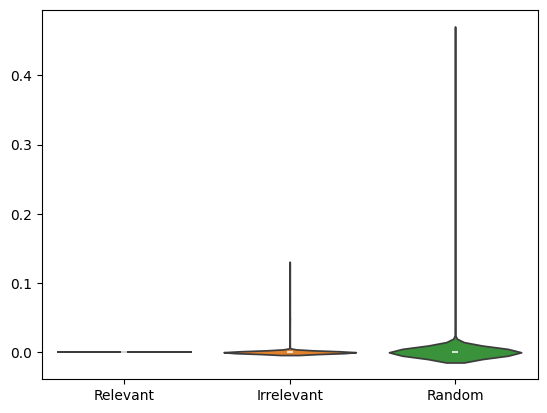

In [29]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_50_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_50_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_50_600_400.png"))
new_row = {'n': 50, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

Average relevant feature importance: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.07676188e-09 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Average irrelevant feature importance: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.04969604 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.    

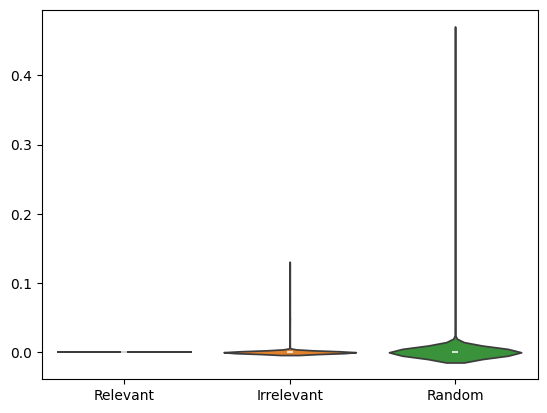

In [44]:
data, info = get_files(50, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_50_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", relevant)
print("Average irrelevant feature importance:", irrelevant)
print("Average random feature importance:", random)

### Adam; N = 500, p = 6, d = 4

In [30]:
data, info = get_files(500, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = adam)
clf_adam_500_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.72653 | train_auc: 0.80191 | valid_auc: 0.77592 |  0:00:01s
epoch 1  | loss: 0.50053 | train_auc: 0.97418 | valid_auc: 0.94649 |  0:00:02s
epoch 2  | loss: 0.34896 | train_auc: 0.94981 | valid_auc: 0.87291 |  0:00:03s
epoch 3  | loss: 0.37975 | train_auc: 0.94996 | valid_auc: 0.88963 |  0:00:04s
epoch 4  | loss: 0.34706 | train_auc: 0.98096 | valid_auc: 0.96154 |  0:00:05s
epoch 5  | loss: 0.38247 | train_auc: 0.96524 | valid_auc: 0.89967 |  0:00:06s
epoch 6  | loss: 0.33111 | train_auc: 0.97706 | valid_auc: 0.94816 |  0:00:07s
epoch 7  | loss: 0.24002 | train_auc: 0.94573 | valid_auc: 0.88629 |  0:00:08s
epoch 8  | loss: 0.35026 | train_auc: 0.9842  | valid_auc: 0.95819 |  0:00:09s
epoch 9  | loss: 0.31613 | train_auc: 0.96801 | valid_auc: 0.92977 |  0:00:10s
epoch 10 | loss: 0.29545 | train_auc: 0.95156 | valid_auc: 0.90635 |  0:00:11s
epoch 11 | loss: 0.25793 | train_auc: 0.96932 | valid_auc: 0.95151 |  0:00:12s
epoch 12 | loss: 0.33259 | train_auc: 0.94421 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.22634010646677136
Average irrelevant feature importance: 0.16048984029984292
Average random feature importance: 0.0
Train AUC score: 0.9913164020610468
Validation AUC score: 1.0
Test AUC score: 0.987012987012987
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 0.5
False positive rate for random features: 0.0


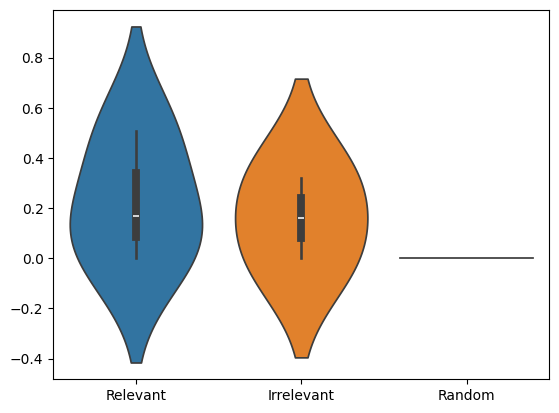

In [31]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_500_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_500_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_500_6_4.png"))
new_row = {'n': 500, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 500, p = 60, d = 40

In [32]:
data, info = get_files(500, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = adam)
clf_adam_500_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.8442  | train_auc: 0.55181 | valid_auc: 0.55556 |  0:00:01s
epoch 1  | loss: 0.6993  | train_auc: 0.54038 | valid_auc: 0.53788 |  0:00:02s
epoch 2  | loss: 0.69916 | train_auc: 0.55576 | valid_auc: 0.41751 |  0:00:03s
epoch 3  | loss: 0.70798 | train_auc: 0.54062 | valid_auc: 0.53704 |  0:00:04s
epoch 4  | loss: 0.71096 | train_auc: 0.55741 | valid_auc: 0.48316 |  0:00:05s
epoch 5  | loss: 0.68115 | train_auc: 0.57386 | valid_auc: 0.6431  |  0:00:07s
epoch 6  | loss: 0.67517 | train_auc: 0.59656 | valid_auc: 0.7096  |  0:00:08s
epoch 7  | loss: 0.66556 | train_auc: 0.57934 | valid_auc: 0.65152 |  0:00:09s
epoch 8  | loss: 0.66666 | train_auc: 0.60974 | valid_auc: 0.63384 |  0:00:10s
epoch 9  | loss: 0.67543 | train_auc: 0.59719 | valid_auc: 0.72559 |  0:00:11s
epoch 10 | loss: 0.68737 | train_auc: 0.64229 | valid_auc: 0.6835  |  0:00:13s
epoch 11 | loss: 0.66292 | train_auc: 0.61076 | valid_auc: 0.74411 |  0:00:14s
epoch 12 | loss: 0.65962 | train_auc: 0.63183 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.0002972404124409708
Average irrelevant feature importance: 0.023563734126380246
Average random feature importance: 0.0007134143348618124
Train AUC score: 1.0
Validation AUC score: 0.9713804713804715
Test AUC score: 0.8428571428571429
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 0.0975609756097561
False positive rate for random features: 0.05


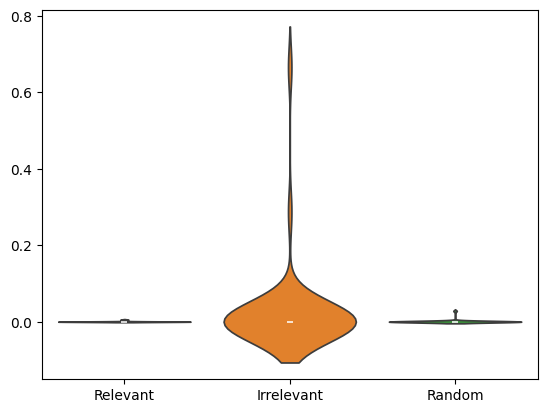

In [33]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_500_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_500_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_500_60_40.png"))
new_row = {'n': 500, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 500, p = 600, d = 400

In [34]:
data, info = get_files(500, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = adam)
clf_adam_500_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.80876 | train_auc: 0.73172 | valid_auc: 0.80917 |  0:00:02s
epoch 1  | loss: 0.6851  | train_auc: 0.78005 | valid_auc: 0.67375 |  0:00:04s
epoch 2  | loss: 0.6253  | train_auc: 0.81116 | valid_auc: 0.78    |  0:00:07s
epoch 3  | loss: 0.62978 | train_auc: 0.66324 | valid_auc: 0.77    |  0:00:09s
epoch 4  | loss: 0.56074 | train_auc: 0.82591 | valid_auc: 0.80333 |  0:00:12s
epoch 5  | loss: 0.54562 | train_auc: 0.81711 | valid_auc: 0.72417 |  0:00:14s
epoch 6  | loss: 0.49151 | train_auc: 0.81907 | valid_auc: 0.75417 |  0:00:16s
epoch 7  | loss: 0.46897 | train_auc: 0.86282 | valid_auc: 0.84958 |  0:00:19s
epoch 8  | loss: 0.47201 | train_auc: 0.92815 | valid_auc: 0.8825  |  0:00:21s
epoch 9  | loss: 0.44499 | train_auc: 0.92082 | valid_auc: 0.835   |  0:00:24s
epoch 10 | loss: 0.46985 | train_auc: 0.93245 | valid_auc: 0.86583 |  0:00:26s
epoch 11 | loss: 0.39404 | train_auc: 0.93746 | valid_auc: 0.87833 |  0:00:29s
epoch 12 | loss: 0.4354  | train_auc: 0.93915 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.0
Average irrelevant feature importance: 0.001914958456051782
Average random feature importance: 9.672713765501347e-05
Train AUC score: 0.993613707165109
Validation AUC score: 0.9525000000000001
Test AUC score: 0.931888544891641
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 0.00796812749003984
False positive rate for random features: 0.01


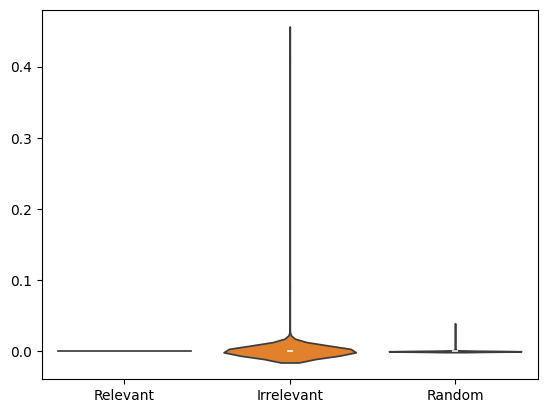

In [35]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_500_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_500_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_500_600_400.png"))
new_row = {'n': 500, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 5000, p = 6, d = 4

In [36]:
data, info = get_files(5000, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = adam)
clf_adam_5000_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.55168 | train_auc: 0.86702 | valid_auc: 0.88146 |  0:00:09s
epoch 1  | loss: 0.50084 | train_auc: 0.90168 | valid_auc: 0.90631 |  0:00:18s
epoch 2  | loss: 0.46531 | train_auc: 0.89396 | valid_auc: 0.89812 |  0:00:28s
epoch 3  | loss: 0.46571 | train_auc: 0.89713 | valid_auc: 0.91305 |  0:00:37s
epoch 4  | loss: 0.48013 | train_auc: 0.89644 | valid_auc: 0.90386 |  0:00:46s
epoch 5  | loss: 0.48119 | train_auc: 0.90091 | valid_auc: 0.91063 |  0:00:56s
epoch 6  | loss: 0.46866 | train_auc: 0.90537 | valid_auc: 0.91329 |  0:01:05s
epoch 7  | loss: 0.45562 | train_auc: 0.9021  | valid_auc: 0.91269 |  0:01:15s
epoch 8  | loss: 0.45727 | train_auc: 0.90477 | valid_auc: 0.91652 |  0:01:24s
epoch 9  | loss: 0.45889 | train_auc: 0.90364 | valid_auc: 0.90823 |  0:01:34s
epoch 10 | loss: 0.45306 | train_auc: 0.89985 | valid_auc: 0.90722 |  0:01:43s
epoch 11 | loss: 0.47449 | train_auc: 0.90024 | valid_auc: 0.91237 |  0:01:52s
epoch 12 | loss: 0.47068 | train_auc: 0.9034  | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.03308940219363071
Average irrelevant feature importance: 0.8566313317977763
Average random feature importance: 0.0027527648569251975
Train AUC score: 0.9055459989925186
Validation AUC score: 0.9193384615384614
Test AUC score: 0.8819975274677438
False negative rate for relevant features: 0.5
False positive rate for irrelevant features: 1.0
False positive rate for random features: 0.5


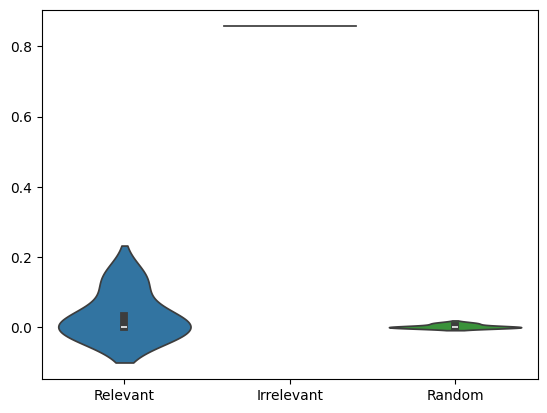

In [37]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_5000_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_5000_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_5000_6_4.png"))
new_row = {'n': 5000, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 5000, p = 60, d = 40

In [38]:
data, info = get_files(5000, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = adam)
clf_adam_5000_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.52906 | train_auc: 0.91092 | valid_auc: 0.92205 |  0:00:10s
epoch 1  | loss: 0.42443 | train_auc: 0.9604  | valid_auc: 0.96336 |  0:00:21s
epoch 2  | loss: 0.37175 | train_auc: 0.984   | valid_auc: 0.98559 |  0:00:32s
epoch 3  | loss: 0.34749 | train_auc: 0.98891 | valid_auc: 0.99193 |  0:00:43s
epoch 4  | loss: 0.32767 | train_auc: 0.97814 | valid_auc: 0.98067 |  0:00:54s
epoch 5  | loss: 0.31709 | train_auc: 0.9872  | valid_auc: 0.98962 |  0:01:05s
epoch 6  | loss: 0.31239 | train_auc: 0.98824 | valid_auc: 0.98953 |  0:01:16s
epoch 7  | loss: 0.30356 | train_auc: 0.99467 | valid_auc: 0.99303 |  0:01:26s
epoch 8  | loss: 0.31548 | train_auc: 0.99138 | valid_auc: 0.98848 |  0:01:37s
epoch 9  | loss: 0.32009 | train_auc: 0.97835 | valid_auc: 0.97731 |  0:01:48s
epoch 10 | loss: 0.33252 | train_auc: 0.99583 | valid_auc: 0.99561 |  0:01:59s
epoch 11 | loss: 0.29152 | train_auc: 0.99653 | valid_auc: 0.99607 |  0:02:10s
epoch 12 | loss: 0.29127 | train_auc: 0.99097 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 8.960304052299169e-11
Average irrelevant feature importance: 0.01646915928624736
Average random feature importance: 0.005237008831862329
Train AUC score: 0.9967786372473592
Validation AUC score: 0.9973085392708588
Test AUC score: 0.9945894689870594
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 0.10416666666666667
False positive rate for random features: 0.025


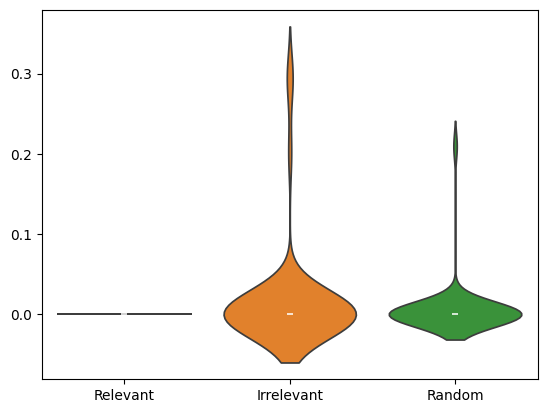

In [39]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_5000_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_5000_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_5000_60_40.png"))
new_row = {'n': 5000, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 5000, p = 600, d = 400

In [40]:
data, info = get_files(5000, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = adam)
clf_adam_5000_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.6435  | train_auc: 0.8136  | valid_auc: 0.81862 |  0:00:21s
epoch 1  | loss: 0.55954 | train_auc: 0.85569 | valid_auc: 0.83936 |  0:00:44s
epoch 2  | loss: 0.5294  | train_auc: 0.86035 | valid_auc: 0.8552  |  0:01:06s
epoch 3  | loss: 0.51926 | train_auc: 0.86517 | valid_auc: 0.85265 |  0:01:28s
epoch 4  | loss: 0.52007 | train_auc: 0.80272 | valid_auc: 0.77997 |  0:01:50s
epoch 5  | loss: 0.52994 | train_auc: 0.85646 | valid_auc: 0.82794 |  0:02:12s
epoch 6  | loss: 0.5188  | train_auc: 0.86664 | valid_auc: 0.8453  |  0:02:35s
epoch 7  | loss: 0.52069 | train_auc: 0.80417 | valid_auc: 0.7819  |  0:02:57s
epoch 8  | loss: 0.51999 | train_auc: 0.8594  | valid_auc: 0.85478 |  0:03:19s
epoch 9  | loss: 0.5203  | train_auc: 0.85565 | valid_auc: 0.85159 |  0:03:42s
epoch 10 | loss: 0.5191  | train_auc: 0.85883 | valid_auc: 0.85541 |  0:04:04s
epoch 11 | loss: 0.51817 | train_auc: 0.85903 | valid_auc: 0.86248 |  0:04:28s
epoch 12 | loss: 0.53424 | train_auc: 0.85575 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 5.0263125693276543e-05
Average irrelevant feature importance: 0.003780618463038382
Average random feature importance: 0.0
Train AUC score: 0.8630286198093081
Validation AUC score: 0.8701828020396128
Test AUC score: 0.8396795104810373
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 0.011538461538461539
False positive rate for random features: 0.0


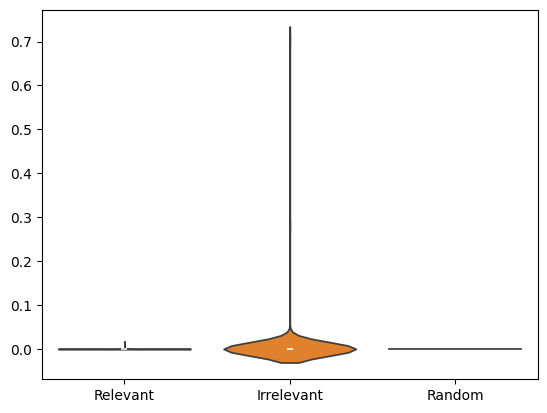

In [41]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_5000_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_5000_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_5000_600_400.png"))
new_row = {'n': 5000, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

In [42]:
adam_df.to_csv(os.path.join("Results/Adam", "adam_data.csv"), index=False)